<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2023S2/blob/main/Lab_Pandas1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Pandas I  

O principal objetivo desse lab é você entender fazer a aquisição de dados com `Pandas` e uma exploração inicial dos dados.

<br>

Referências e Materiais úteis para este Lab:

* [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_2023S2/blob/main/Lab_Pandas_notes.ipynb)


<br>

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png
" width=150>

* [Jake VanderPlas. **Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<br>
---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **CASE: Insurance**

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/Analise_de_Dados_2023S2/raw/main/insurance.csv) para as questões a seguir.



##### Q1. Acesse os dados explore a estrutura básica dos dados de `insurance`.

> * Qual o número de caso de seguro?
> * Quantos atributos são numéricos?
> * Há quantos valores diferentes para região?
> * Qual a maior quantidade de filhos?

In [2]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_Dados_2023S2/raw/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
len(df), df.shape[0]

(1338, 1338)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.select_dtypes('number')

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [7]:
df.select_dtypes('number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [8]:
len( df.select_dtypes('number').columns )

4

In [9]:
df.children = df.children.astype('str')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df.region.nunique()

4

In [14]:
len( df.region.unique() )

4

In [15]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_Dados_2023S2/raw/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.children.max()

5

Há quantos segurados com quantidade de filhos maior que a média?

In [18]:
df.children.mean()

1.0949177877429

In [19]:
df[ df.children == 5 ]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [20]:
len( df[ df.children == 5 ] )

18

In [21]:
len( df[ df.children > df.children.mean() ] )

440

##### Q2. Qual a quantidade de casos por região?

In [22]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

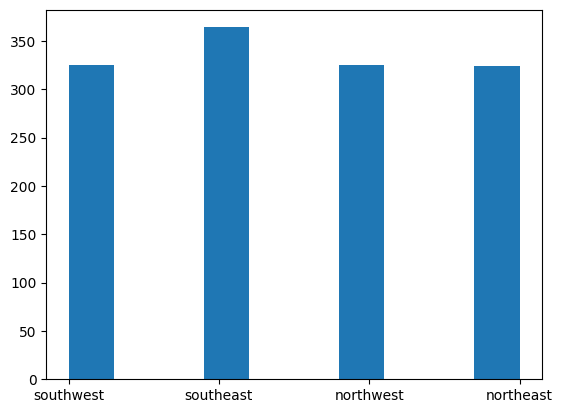

In [23]:
plt.hist(df.region)
plt.show()

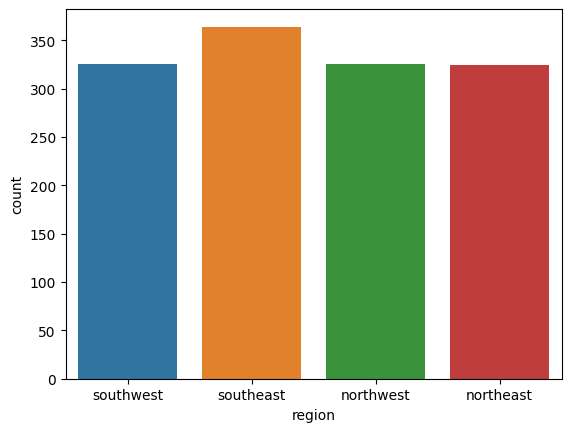

In [24]:
sns.countplot(data=df,x='region')
plt.show()

##### Q3. Qual a média dos pagamentos (charges) efetuados?

In [25]:
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
df.charges.mean()

13270.422265141257

In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
print(f'valor médio das charges: {.2f:df.charges.mean()}')

SyntaxError: ignored

##### Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [29]:
df.charges.nlargest(10)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

In [30]:
df.nlargest(10,'charges')

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [33]:
df.charges.sort_values(ascending=False)[0:10]

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

In [34]:
df.charges.nlargest(10).mean()

55130.961078

In [ ]:
#@markdown extra
df[ df.charges >= df.charges.nlargest(10).values[-1] ].charges.mean()

55130.961078

##### Q5. Qual o percentual de mulheres seguradas?

In [37]:
len( df[ df.sex == 'female' ] ) / len(df)

0.4947683109118087

##### Q6. Qual o percentual de mulheres seguradas fumantes?

In [38]:
len( df[ (df.sex == 'female') & (df.smoker == 'yes') ] ) / len(df)

0.08594917787742899

##### Q7. Qual o valor médio pago pelos homens segurados?

In [39]:
df.charges.mean()

13270.422265141257

In [42]:
df[df.sex == 'male']

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [43]:
df[df.sex == 'male'].charges.mean()

13956.751177721893

##### Q8. Qual a média de idade dos homens e mulheres?

In [44]:
df[df.sex == 'male'].age.mean(), df[df.sex == 'female'].age.mean()

(38.917159763313606, 39.503021148036254)

Extra...

In [45]:
df.groupby('sex').age.mean()

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

##### Q9. Calcule a distância interquartis dos pagamentos.

**Dica** Empregue a função `quantile()` do `Pandas` e use IQR = Q3 - Q1.



In [46]:
Q3 = df.charges.quantile(0.75)
Q1 = df.charges.quantile(0.25)

In [47]:
Q1, Q3

(4740.28715, 16639.912515)

In [48]:
Q1, Q3 = df.charges.quantile([0.25, 0.75])
Q1, Q3

(4740.28715, 16639.912515)

In [49]:
IQR = Q3 - Q1

##### Q10. Empregue o valor IQR da questão anterior para verificar se existem *outliers* dos pagamentos.

**Dica** *outliers* são dados fora do intervalo $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$

In [52]:
df[(df.charges < Q1 - 1.5 * IQR) | (df.charges > Q3 + 1.5 * IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


##### Q11. Faça um gráfico de caixa dos valores de `charges` para homens e mulheres.

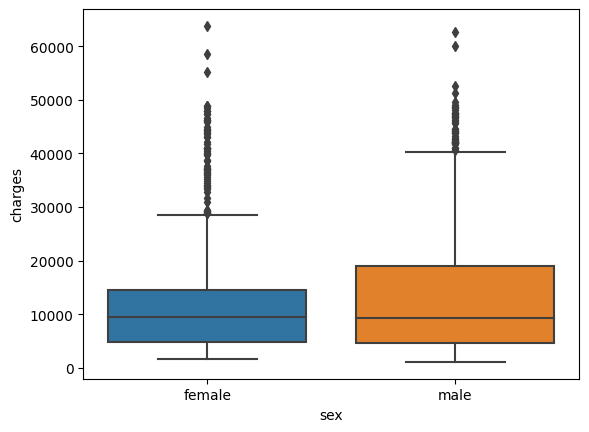

In [56]:
sns.boxplot(x='sex', y='charges',data=df)
plt.show()